## Mushroom Classifier End to End Data Science Project

### Dataset : https://www.kaggle.com/uciml/mushroom-classification



In [1]:
#importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the data for the Data Analysis

df = pd.read_csv("data/mushrooms.csv")

In [3]:
#Reading the data
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
#Let's identify null values

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#No null values present, lets identify the duplicates

df.duplicated().sum()

0

In [6]:
#No duplicates & Null values present in data, so data is clean & Ready to use.

#Let's do about feature engineering, and identify different features present in dataset

In [7]:
#Let's check the columns present in the dataset,
columns = df.columns.tolist()
columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [8]:
#Let's identify the unique categories in each column

for i in df.columns:
    values = df[i].unique()
    print(f"{i}")
    print(values)
    print()


class
['p' 'e']

cap-shape
['x' 'b' 's' 'f' 'k' 'c']

cap-surface
['s' 'y' 'f' 'g']

cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises
['t' 'f']

odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment
['f' 'a']

gill-spacing
['c' 'w']

gill-size
['n' 'b']

gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape
['e' 't']

stalk-root
['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring
['s' 'f' 'k' 'y']

stalk-surface-below-ring
['s' 'f' 'y' 'k']

stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type
['p']

veil-color
['w' 'n' 'o' 'y']

ring-number
['o' 't' 'n']

ring-type
['p' 'e' 'l' 'f' 'n']

spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population
['s' 'n' 'a' 'v' 'y' 'c']

habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']



In [9]:
#all features are classified into alphabet, so all feature should for full name & meaning

#### Feature Attribute Information:
##### Obtain through Internet source

1. class: poisonous=p, edible=e (target feature)
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
5. bruises?: bruises=t,no=f
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: attached=a,descending=d,free=f,notched=n
8. gill-spacing: close=c,crowded=w,distant=d
9. gill-size: broad=b,narrow=n
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
11. stalk-shape: enlarging=e,tapering=t
12. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
17. veil-type: partial=p,universal=u
18. veil-color: brown=n,orange=o,white=w,yellow=y
19. ring-number: none=n,one=o,two=t
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
22. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
23. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [10]:
#We will change the name of features with respect to each name given above to get more idea & we can actually correlate

#### 1. Class

In [11]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [12]:
#Replacing alphabet with original feature name

df['class'] = df['class'].replace(['e','p'],['edible','poisonous'])
df["class"]

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
8119       edible
8120       edible
8121       edible
8122    poisonous
8123       edible
Name: class, Length: 8124, dtype: object

In [13]:
#Similar, above alphabet feature can be replace with it's name, to identify feature at the end

#### 2. Cap shape

In [14]:
df["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [15]:
df['cap-shape'] = df['cap-shape'].replace(['b','c','x','f','k','s'],['bell','conical','convex','flat', 'knobbed', 'sunken' ])
df['cap-shape']

0        convex
1        convex
2          bell
3        convex
4        convex
         ...   
8119    knobbed
8120     convex
8121       flat
8122    knobbed
8123     convex
Name: cap-shape, Length: 8124, dtype: object

#### 3. Cap surface

In [16]:
df["cap-surface"].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [17]:
df['cap-surface'] = df['cap-surface'].replace(['f','g','y','s'],['fibrous','grooves','scaly','smooth'])
df['cap-surface']

0       smooth
1       smooth
2       smooth
3        scaly
4       smooth
         ...  
8119    smooth
8120    smooth
8121    smooth
8122     scaly
8123    smooth
Name: cap-surface, Length: 8124, dtype: object

#### 4. Cap color

In [18]:
df["cap-color"].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [19]:
df['cap-color'] = df['cap-color'].replace(['n','b','c','g','r','p','u','e','w','y'],['brown','buff','cinnamon','gray','green', 'pink','purple','red','white','yellow'])
df['cap-color']

0        brown
1       yellow
2        white
3        white
4         gray
         ...  
8119     brown
8120     brown
8121     brown
8122     brown
8123     brown
Name: cap-color, Length: 8124, dtype: object

#### 5. Bruises

In [20]:
df["bruises"].unique()

array(['t', 'f'], dtype=object)

In [21]:
df['bruises'] = df['bruises'].replace(['t','f'],['yes','no'])
df['bruises']

0       yes
1       yes
2       yes
3       yes
4        no
       ... 
8119     no
8120     no
8121     no
8122     no
8123     no
Name: bruises, Length: 8124, dtype: object

#### 6. Odor

In [22]:
df["odor"].unique()


array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [23]:
df['odor'] = df['odor'].replace(['a','l','c','y','f','m','n','p','s'],['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'])
df['odor']

0       pungent
1        almond
2         anise
3       pungent
4          none
         ...   
8119       none
8120       none
8121       none
8122      fishy
8123       none
Name: odor, Length: 8124, dtype: object

#### 7. Gill attachment

In [24]:
df["gill-attachment"].unique()

array(['f', 'a'], dtype=object)

In [25]:

df['gill-attachment'] = df['gill-attachment'].replace(['a','f'],['attached','free'])
df['gill-attachment']

0           free
1           free
2           free
3           free
4           free
          ...   
8119    attached
8120    attached
8121    attached
8122        free
8123    attached
Name: gill-attachment, Length: 8124, dtype: object

#### 8. Gill Spacing

In [26]:
df["gill-spacing"].unique()

array(['c', 'w'], dtype=object)

In [27]:
df['gill-spacing'] = df['gill-spacing'].replace(['c','w'],['close','crowded'])
df['gill-spacing']

0         close
1         close
2         close
3         close
4       crowded
         ...   
8119      close
8120      close
8121      close
8122      close
8123      close
Name: gill-spacing, Length: 8124, dtype: object

#### 9. Gill Size

In [28]:
df["gill-size"].unique()

array(['n', 'b'], dtype=object)

In [29]:
df['gill-size'] = df['gill-size'].replace(['b','n'],['broad','narrow'])
df['gill-size']

0       narrow
1        broad
2        broad
3       narrow
4        broad
         ...  
8119     broad
8120     broad
8121     broad
8122    narrow
8123     broad
Name: gill-size, Length: 8124, dtype: object

#### 10. Gill Color

In [30]:
df["gill-color"].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

In [31]:
df['gill-color'] = df['gill-color'].replace(['k','n','b','h','g','r','o','p','u','e','w','y'],['black','brown','buff','chocolate','gray', 'green','orange','pink','purple','red', 'white','yellow'])
df['gill-color']

0        black
1        black
2        brown
3        brown
4        black
         ...  
8119    yellow
8120    yellow
8121     brown
8122      buff
8123    yellow
Name: gill-color, Length: 8124, dtype: object

#### 11. Stalk shape

In [32]:
df["stalk-shape"].unique()

array(['e', 't'], dtype=object)

In [33]:
df['stalk-shape'] = df['stalk-shape'].replace(['e','t'],['enlarging','tapering'])
df['stalk-shape']

0       enlarging
1       enlarging
2       enlarging
3       enlarging
4        tapering
          ...    
8119    enlarging
8120    enlarging
8121    enlarging
8122     tapering
8123    enlarging
Name: stalk-shape, Length: 8124, dtype: object

#### 12. Stalk root

In [34]:
df["stalk-root"].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [35]:
df['stalk-root'] = df['stalk-root'].replace(['b','c','e','r','?'],['bulbous','club','equal','rooted','missing'])
df['stalk-root']

0         equal
1          club
2          club
3         equal
4         equal
         ...   
8119    missing
8120    missing
8121    missing
8122    missing
8123    missing
Name: stalk-root, Length: 8124, dtype: object

#### 13. Stalk surface above ring

In [36]:
df["stalk-surface-above-ring"].unique()

array(['s', 'f', 'k', 'y'], dtype=object)

In [37]:
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace(['f','y','k','s'],['fibrous','scaly','silky','smooth'])
df['stalk-surface-above-ring']

0       smooth
1       smooth
2       smooth
3       smooth
4       smooth
         ...  
8119    smooth
8120    smooth
8121    smooth
8122    smooth
8123    smooth
Name: stalk-surface-above-ring, Length: 8124, dtype: object

#### 14. Stalk surface below ring

In [38]:
df["stalk-surface-below-ring"].unique()

array(['s', 'f', 'y', 'k'], dtype=object)

In [39]:
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace(['f','y','k','s'],['fibrous','scaly','silky','smooth'])
df['stalk-surface-below-ring']

0       smooth
1       smooth
2       smooth
3       smooth
4       smooth
         ...  
8119    smooth
8120    smooth
8121    smooth
8122     silky
8123    smooth
Name: stalk-surface-below-ring, Length: 8124, dtype: object

#### 15. Stalk color above ring

In [40]:
df["stalk-color-above-ring"].unique()

array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object)

In [41]:
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace(['n','b','c','g','o','p','e','w','y'],['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['stalk-color-above-ring']

0        white
1        white
2        white
3        white
4        white
         ...  
8119    orange
8120    orange
8121    orange
8122     white
8123    orange
Name: stalk-color-above-ring, Length: 8124, dtype: object

#### 16. Stalk color below ring

In [42]:
df["stalk-color-below-ring"].unique()

array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object)

In [43]:
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace(['n','b','c','g','o','p','e','w','y'],['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['stalk-color-below-ring']

0        white
1        white
2        white
3        white
4        white
         ...  
8119    orange
8120    orange
8121    orange
8122     white
8123    orange
Name: stalk-color-below-ring, Length: 8124, dtype: object

#### 17. Veil type

In [44]:
df["veil-type"].unique()

array(['p'], dtype=object)

In [45]:
df['veil-type'] = df['veil-type'].replace(['p'],['partial'])
df['veil-type']

0       partial
1       partial
2       partial
3       partial
4       partial
         ...   
8119    partial
8120    partial
8121    partial
8122    partial
8123    partial
Name: veil-type, Length: 8124, dtype: object

In [46]:
#It can be seen there is only 1 veil type in the feature, so we can remove as it will be having no impact on training

#### 18. Veil color

In [47]:
df["veil-color"].unique()

array(['w', 'n', 'o', 'y'], dtype=object)

In [48]:
df['veil-color'] = df['veil-color'].replace(['b','o','w','y'],['brown','orange','white','yellow'])
df['veil-color']

0        white
1        white
2        white
3        white
4        white
         ...  
8119    orange
8120         n
8121    orange
8122     white
8123    orange
Name: veil-color, Length: 8124, dtype: object

#### 19. Ring number

In [49]:
df["ring-number"].unique()

array(['o', 't', 'n'], dtype=object)

In [50]:
df['ring-number'] = df['ring-number'].replace(['n','o','t'],['none','one','two'])
df['ring-number']

0       one
1       one
2       one
3       one
4       one
       ... 
8119    one
8120    one
8121    one
8122    one
8123    one
Name: ring-number, Length: 8124, dtype: object

#### 20. Ring type

In [51]:
df["ring-type"].unique()

array(['p', 'e', 'l', 'f', 'n'], dtype=object)

In [52]:
df['ring-type'] = df['ring-type'].replace(['e','f','l','n','p'],['evanescent','flaring','large','none','pendant'])
df['ring-type']

0          pendant
1          pendant
2          pendant
3          pendant
4       evanescent
           ...    
8119       pendant
8120       pendant
8121       pendant
8122    evanescent
8123       pendant
Name: ring-type, Length: 8124, dtype: object

#### 21. Spore print color

In [53]:
df["spore-print-color"].unique()

array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object)

In [54]:
df['spore-print-color'] = df['spore-print-color'].replace(['k','n','b','h','r','o','u','w','y'],['black','brown','buff','chocolate','green','orange','purple','white','yellow'])
df['spore-print-color']

0        black
1        brown
2        brown
3        black
4        brown
         ...  
8119      buff
8120      buff
8121      buff
8122     white
8123    orange
Name: spore-print-color, Length: 8124, dtype: object

#### 22. Population

In [55]:
df["population"].unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

In [56]:
df['population'] = df['population'].replace(['a','c','n','s','v','y'],['abundant','clustered','numerous','scattered','several','solitary'])
df['population']

0       scattered
1        numerous
2        numerous
3       scattered
4        abundant
          ...    
8119    clustered
8120      several
8121    clustered
8122      several
8123    clustered
Name: population, Length: 8124, dtype: object

#### 23. Habitat

In [57]:
df["habitat"].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [58]:
df['habitat'] = df['habitat'].replace(['g','l','m','p','u','w','d'],['grasses','leaves','meadows','paths','urban','waste','woods'])
df['habitat']

0         urban
1       grasses
2       meadows
3         urban
4       grasses
         ...   
8119     leaves
8120     leaves
8121     leaves
8122     leaves
8123     leaves
Name: habitat, Length: 8124, dtype: object

In [59]:
##All the data has been segregated
#We can carry out different visualization & techniques to identify the relation


In [60]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,n,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [61]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<Axes: xlabel='class', ylabel='count'>

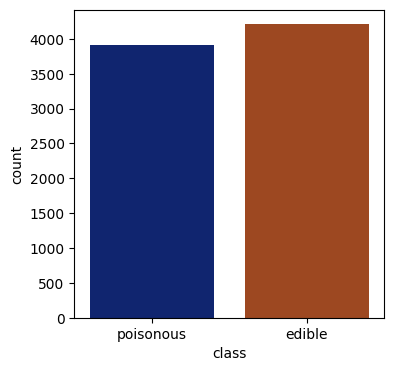

In [62]:
#Let's see each feature with class to get idea of correlation if any found

#Let's see the no of edible & poisonous features in dataset to get idea
plt.figure(figsize=(4,4))
sns.countplot(data=df, x=df['class'], palette="dark")

##### The poisonous data is around 3900 & eatable is around 4300, so it can be assume as a balance data.

In [63]:
#Let's counter plot with eatable & poisounous class with all the features present to get the idea

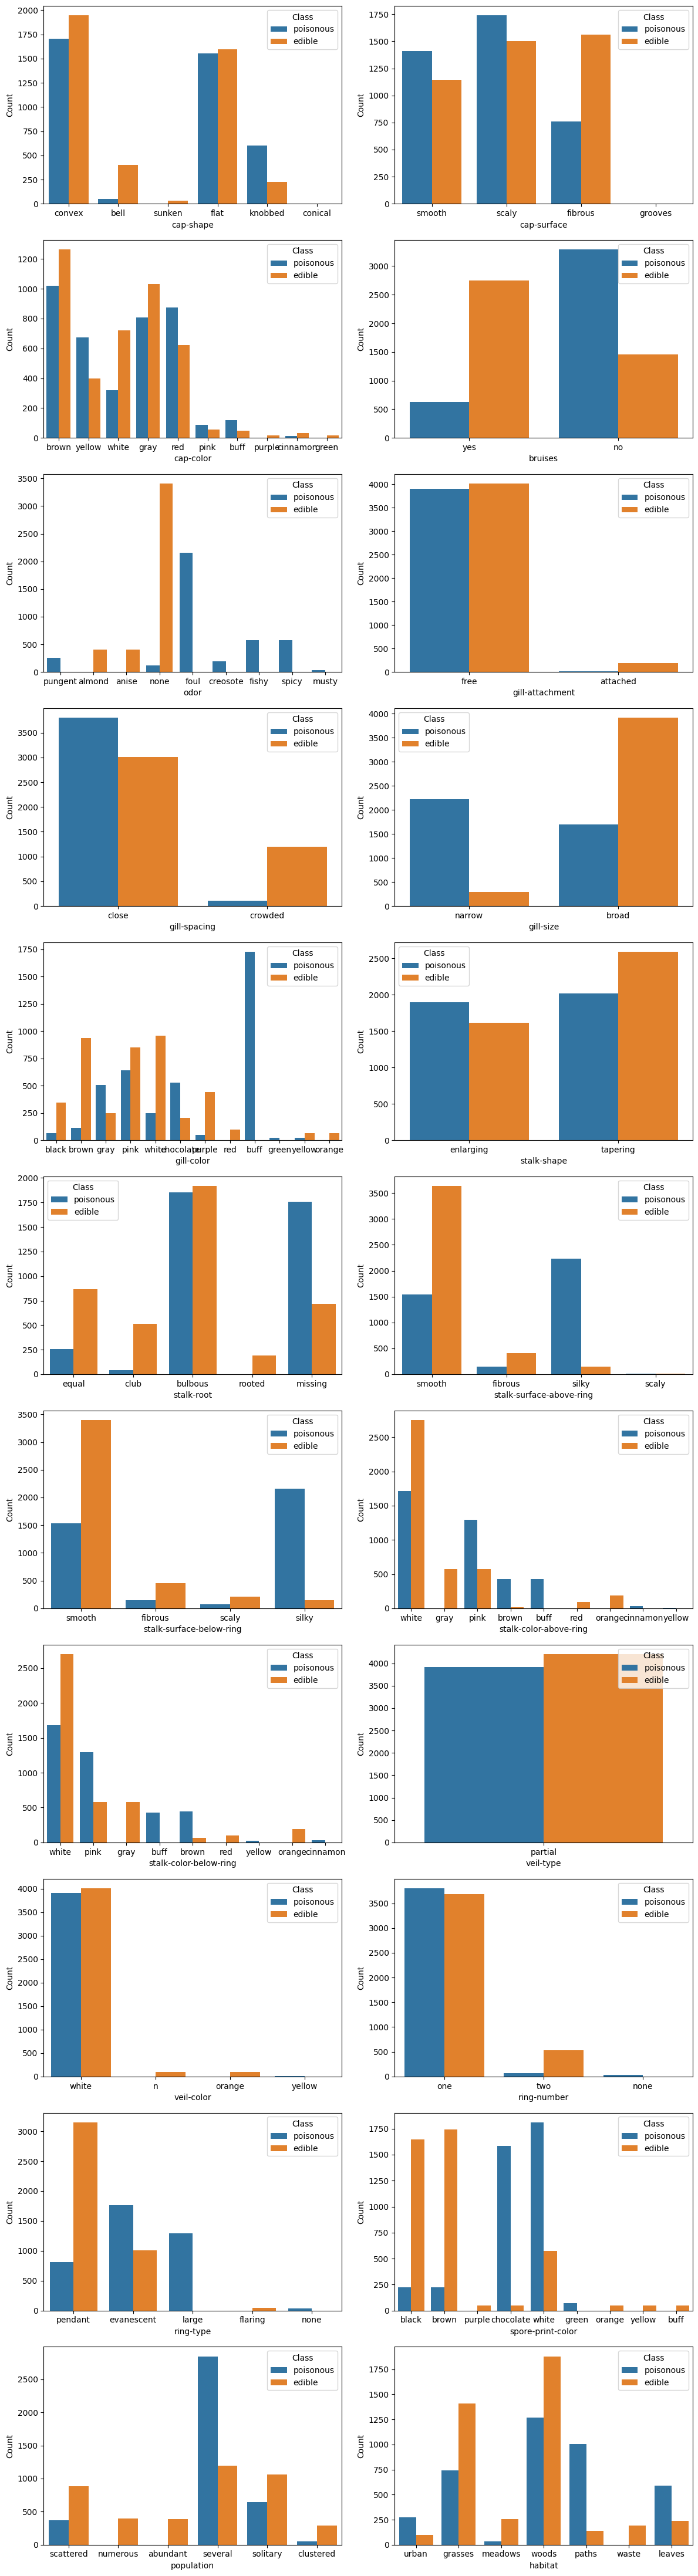

In [64]:
features = df.columns.tolist()  # Get a list of all column names

# Remove the "class" column from the list of features
features.remove("class")

# Calculate the number of rows needed
num_rows = (len(features) + 1) // 2

# Set the figure size
plt.figure(figsize=(12, num_rows * 4))  # Adjust the figure size as needed

# Iterate through each feature and create a countplot
for i, feature in enumerate(features, start=1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=df, x=feature, hue='class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Class')

# Adjust the spacing between subplots
plt.tight_layout()

### Data Analysis from countplot 

- 1. cap-shape: It is mostly consist of convex & flat cap-shape, which almost look balanced with respective poisonous & eatable. Data almost has least conical & sunken cap-shape mushrooms so getting seen as less significance. 

- 2. cap-surface: Data mostly has smooth, scaly & fibrous cap-surfaces which almost look balance between poisonous & edible also getting seen as less significance to mushroom class

- 3. cap-color: It has variety of cap-color, having somewhat difference comparing both, may be contributing to class.

- 4. bruises: The nice significance getting seen as if it is having bruises it is having more chance of getting eatable while if it doesn't have bruishes, it is more chance of being poisonous.

- 5. odor: It may be highest significance contributing as few features are almost contibuting to single class. i.e. like if it's odor is almond, anise or none, it is high chance that mushroom is eatable, while if odor is foul, cerosote, fishy, spicy or musty, it is high that mushroom is poisonous. So looking at the counter plot, this feature is getting seen as the most significance one.

- 6. gill-attachment: Classes is seen almost balance between edible & poisonous. So it seems less significance. 

- 7. gill-spacing: Here also classes split sees balance but sees somewhat high chance of crowded being edible but can't tell significance as there is less number of data.

- 8. gill-size: There sees somewhat some imbalance with class, where narrow contributing more to poisonous while broad contributing to edible. It can be seen as somewhat significance to contributing to class.

- 9. gill-color: The seems balance to class for some color with some color contributing more to some class, but major takeaway can be seen as "buff" color which is contributing fully to poisonous class. So it can be takeaway if gill-color is "buff", mushroom is highly likely to be poisonous. 

- 10. stalk-shape: Data seems balance between classes, so can't be seen as significance to class.

- 11. stalk-root: Bulbous seems balance between two, while "equal", "club", "rooted" seems contributing more to edible class, while "missing" seem more chance contributing to poisonous.

- 12. stalk-surface-above-ring: "smooth" seems more contribution to edible while "silky" seeks more probability of been poisonous.

- 13. stalk-surface-below ring: Likewise above feature of stak-surface-above ring is distributed similar kind counterplot with features. So it can be tell that both features are almost similar type (May be 1 can be use during final approach)

- 14. stalk-color-above-ring: "White"  &  "Pink" seems some high-low balance between features rest colors sees bias towards 1 class, i.e. edible or poisonous

- 15. stalk-color-below-ring: Countplot is similar with feature of "stalk-color-above-ring". (so like above any 1 feature can be use during final apporach)

- 16. veil-type: It is having only 1 category i.e. "partial" accross, so can't have any significance. (It can be removed during final approach)

- 17. veil-color: "White" color seems balance between class, while others significance can't be said as they are less in number. 

- 18. ring-number: Most data consist of "one-ring" & it seems balance between classes. 

- 19. ring-type: "pendant" type ring seems contributing more to edible class while "large" rings is mostly poisonous class. 

- 20. spore-print-color: "black" & "brown" seems to contribute more to edible class while "chocolate" & "white" seems to contribute to "poisonous" class. 

- 21. population: Almost all category seems balance while "several" contributing more to poisonous & "numerous" & "abundant" contributing only  to edible.

- 22. habitat: Just "waste" category having edible class but also with less numbers, significance can't be determined.

### From above analysis, the features that seems highly contributing to class detection can be:

- 1. bruises
- 2. odor
- 3. gill-size 
- 4. gill-color
- 5. stalk-surface-above-ring or stalk-surface-below-ring (Any one)
- 6. stalk-color-above-ring or stalk-color-below-ring (any one)
- 7. ring type
- 8. spore-print-color
- 9. ring-type
- 10. population

##### Analysing from above features, it is more likely "Decision Tree" & with "Random forest" seems best classifier, as few of the catogories in feature direct suggest the class of mushroom (edible or poisonous).

In [65]:
#Let's start with processing Model Preprocessing steps

In [66]:
#Let's check Data with Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [67]:
#Separating dependent & independent features

X = df.drop("class", axis = 1)
y = df["class"]

In [68]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,1,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,1,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,1,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,1,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,3,0,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0


In [69]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [70]:
#1 is for poisonous
#2 is for edible

In [71]:
#We will apply PCA as there are too many columns, we will select best 10 components who significantly seems different

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit_transform(X)

In [72]:
pca.explained_variance_ratio_

array([0.2388711 , 0.20788412, 0.14265078, 0.13125479, 0.08993553,
       0.05589716, 0.02931427, 0.02735359, 0.01776144, 0.01524282])

In [73]:
#Spliting dataset into train-test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_fit, y, test_size= 0.3, random_state= 10)

In [74]:
X_train

array([[-4.19778381e+00,  2.69622605e+00,  2.98352310e+00, ...,
        -9.65205973e-02, -2.35113876e-01,  4.98873653e-04],
       [ 7.50445701e+00,  5.05611436e-01, -7.09525421e-02, ...,
         2.59035085e+00, -8.30297583e-01, -1.65677971e-01],
       [-2.89371254e-01, -8.09725459e-01, -9.97317445e-01, ...,
         8.15280294e-01, -1.61149348e+00,  5.64865153e-01],
       ...,
       [-3.23647571e-01, -1.52865133e-01,  5.00381461e+00, ...,
        -5.45961278e-01,  2.04167548e-01, -1.07785476e+00],
       [-3.55463546e-02, -2.54943387e+00, -3.03997261e+00, ...,
         5.57601974e-01,  3.67776973e-01,  5.77614609e-01],
       [-3.40466406e+00,  5.06903635e+00, -3.30035322e+00, ...,
        -9.41002666e-01,  2.08983860e+00,  3.30738268e-02]])

In [75]:
y_train

6506    1
2314    0
2898    0
1178    0
2341    0
       ..
3441    1
1344    0
4623    1
7293    0
1289    0
Name: class, Length: 5686, dtype: int32

In [76]:
#importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
LR = LogisticRegression()
KN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()

In [78]:
#Let's fit above models into dataset

LR.fit(X_train, y_train)
KN.fit(X_train, y_train)
SV.fit(X_train, y_train)
DT.fit(X_train, y_train)
RF.fit(X_train, y_train)
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [79]:
#Data prediction

y_pred1 = LR.predict(X_test)
y_pred2 = KN.predict(X_test)
y_pred3 = SV.predict(X_test)
y_pred4 = DT.predict(X_test)
y_pred5 = RF.predict(X_test)
y_pred6 = GB.predict(X_test)

In [80]:
#Evaluating all algorithm

from sklearn.metrics import accuracy_score

In [81]:
print(f"LR: {round((accuracy_score(y_test, y_pred1)),4)*100} %")
print(f"KN: {round((accuracy_score(y_test, y_pred2)),4)*100} %")
print(f"SV: {round((accuracy_score(y_test, y_pred3)),4)*100} %")
print(f"DT: {round((accuracy_score(y_test, y_pred4)),4)*100} %")
print(f"RF: {round((accuracy_score(y_test, y_pred5)),4)*100} %")
print(f"GB: {round((accuracy_score(y_test, y_pred6)),4)*100} %")

LR: 84.61999999999999 %
KN: 99.96000000000001 %
SV: 99.67 %
DT: 98.65 %
RF: 99.92 %
GB: 98.72999999999999 %


### As predicted above, Random Forest gives the best classification along with Support Vector classification & K Nearest Neighbour

In [82]:
## For the reference of above in Dataframe

accuracy_scores = pd.DataFrame({
    "Models" : ["LogisticRegression", "KNeighbor", "SupportVector", "DecisionTree", "RandomForest", "GradientBoosting"],
    "Acc%" : [
        round((accuracy_score(y_test, y_pred1)),4)*100,
        round((accuracy_score(y_test, y_pred2)),4)*100,
        round((accuracy_score(y_test, y_pred3)),4)*100,
        round((accuracy_score(y_test, y_pred4)),4)*100,
        round((accuracy_score(y_test, y_pred5)),4)*100,
        round((accuracy_score(y_test, y_pred6)),4)*100
    ]
})

In [83]:
accuracy_scores

,Models,Acc%
0,LogisticRegression,84.62
1,KNeighbor,99.96
2,SupportVector,99.67
3,DecisionTree,98.65
4,RandomForest,99.92
5,GradientBoosting,98.73


### RandomForest can be Model used in production. 

-- After analysising let's develop code in production (:-) & test the app